In [13]:
pip install node2vec


Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install umap-learnpip install --upgrade scikit-learn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/8.0 MB 3.1 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.0 MB 3.0 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.0 MB 3.1 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.0 MB 3.2 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.0 MB 3.2 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.0 MB 3.1 MB/s eta 0:00:02
   -------------------------- ------------- 5.2/8.0 MB 3.2 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 3.2 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.0 MB 3.2 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.0 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 3.3 MB/s eta 0:00:00
  Attempting uninst

In [23]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install --upgrade numba

   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --------------- ------------------------ 1.0/2.8 MB 5.6 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.8 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   - -------------------------------------- 1.6/38.1 MB 8.4 MB/s eta 0:00:05
   --- ------------------------------------ 2.9/38.1 MB 7.3 MB/s eta 0:00:05
   ---- ----------------------------------- 4.5/38.1 MB 7.4 MB/s eta 0:00:05
   ------ --------------------------------- 6.3/38.1 MB 7.7 MB/s eta 0:00:05
   -------- ------------------------------- 8.1/38.1 MB 7.7 MB/s eta 0:00:04
   ---------- ----------------------------- 9.7/38.1 MB 7.7 MB/s eta 0:00:04
   ------------ --------------------------- 11.5/38.1 MB 7.8 MB/s eta 0:00:04
   -------------- ------------------------- 13.4/38.1 MB 7.9 MB/s eta 0:00:04
   ------------

In [11]:
%load_ext autoreload
%autoreload 2
import fonctions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec 
import umap

Chargement des liens depuis sample graphs/graph_2022-01-01_to_2022-01-14.csv...
------------------------------
Nombre de nœuds : 37873
Nombre d'arêtes (retweets) : 47197
------------------------------


{1006419421244678144: Text(-0.7371931734645357, -0.15524738212872194, '1006419421244678144'),
 956250134786002944: Text(0.05686611188446481, -0.40368351663010626, '956250134786002944'),
 742756581121642496: Text(-0.6077428418342603, -0.7106327767524808, '742756581121642496'),
 1450750205826146306: Text(-0.7657371928482951, 0.5860971730258014, '1450750205826146306'),
 707231479047315456: Text(0.4534834376966912, 0.8067125385641444, '707231479047315456'),
 1425973659152355329: Text(-0.5371434668454104, 0.8500243627003882, '1425973659152355329'),
 1066521202519416833: Text(-0.11537405231911849, -0.6456472359542529, '1066521202519416833'),
 384923143: Text(0.38756705949082, -0.5480713038986925, '384923143'),
 1270133776748855304: Text(-0.8112041864460781, 0.1319428003464526, '1270133776748855304'),
 1418881588671221769: Text(0.08972403743320213, -0.8791669864259121, '1418881588671221769'),
 1163992520252153857: Text(0.42832542273426144, -0.8577680109725123, '1163992520252153857'),
 1437001

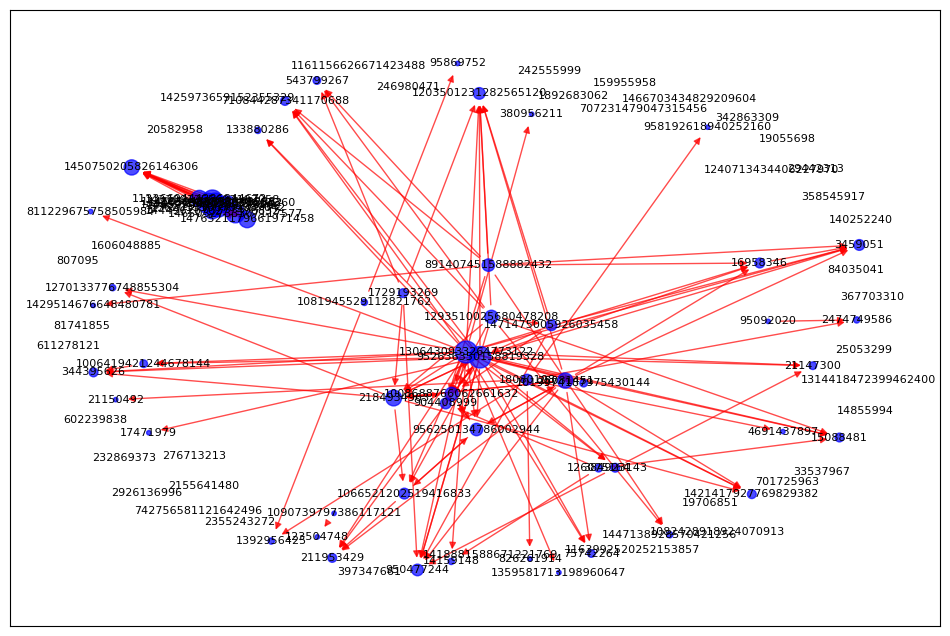

In [19]:
fichier_test = 'sample graphs/graph_2022-01-01_to_2022-01-14.csv'

G = fonctions.creer_graphe_twitter(fichier_test)

degrees = dict(G.degree())
top_nodes = sorted(degrees, key=degrees.get, reverse=True)[:100]
Gs = G.subgraph(top_nodes)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(Gs, seed=42) 
nx.draw_networkx_nodes(Gs, pos, node_size=[v * 10 for v in dict(Gs.degree()).values()], node_color='blue', alpha=0.7)
nx.draw_networkx_edges(Gs, pos, alpha=0.7, edge_color='red')
nx.draw_networkx_labels(Gs, pos, font_size=8)

In [10]:
print("Génération des marches aléatoires (cela peut prendre une minute)...")
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=100, workers=4)

print("Entraînement du modèle...")
model = node2vec.fit(window=10, min_count=1, batch_words=4)

model.wv.save_word2vec_format("twitter_nodes.emb")
print("Terminé ! les utilisateurs sont maintenant des vecteurs dans 'twitter_nodes.emb'")

Génération des marches aléatoires (cela peut prendre une minute)...


NameError: name 'G' is not defined

Chargement des données...
Chargement de 37873 nœuds en 64 dimensions...
Calcul UMAP sur la totalité des points (37873 nœuds)...


C:\Users\Elyes DJOUHRI\anaconda2\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


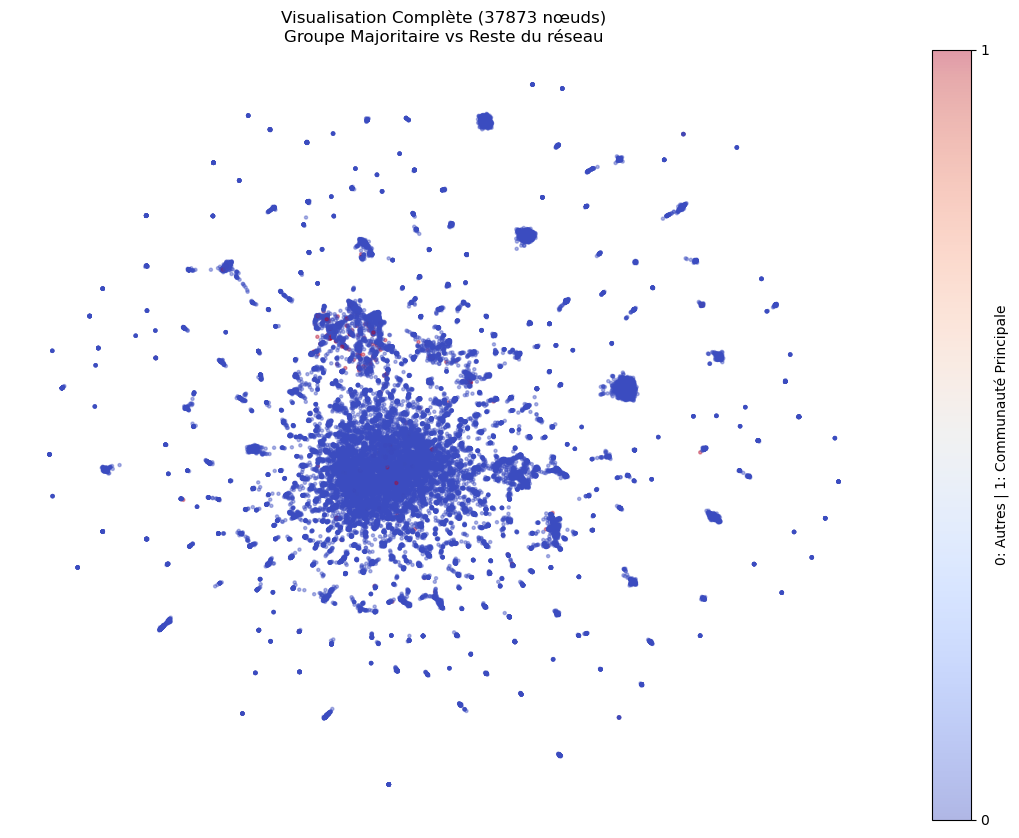

In [17]:
EMB_FILE = 'twitter_nodes.emb'
CSV_FILE = 'sample graphs/NODES_climatoscope_graph_2022-07-01_2022-10-30_th=3.0_flc=0_world_2185-pro-anti_Louvaindic_testtop_tableusers.csv'

print("Chargement des données...")
embeddings, node_ids = test.load_node2vec_embeddings(EMB_FILE)
df_meta = pd.read_csv(CSV_FILE)
df_meta['Id'] = df_meta['Id'].astype(str)

mapping_opinion = dict(zip(df_meta['Id'], df_meta['modularity_class']))

main_community = df_meta['modularity_class'].value_counts().idxmax()

labels = []
for uid in node_ids:
    comm = mapping_opinion.get(uid, -1)
    labels.append(1 if comm == main_community else 0)

reducer = umap.UMAP(
    n_neighbors=15, 
    min_dist=0.1, 
    metric='cosine',
    random_state=42
)
embedding_2d = reducer.fit_transform(embeddings)

plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    embedding_2d[:, 0], 
    embedding_2d[:, 1], 
    c=labels, 
    cmap='coolwarm', 
    s=5,           
    alpha=0.4     
)

plt.title(f"Visualisation Complète ({len(node_ids)} nœuds)\nGroupe Majoritaire vs Reste du réseau")
plt.colorbar(scatter, ticks=[0, 1], label='0: Autres | 1: Communauté Principale')
plt.axis('off')
plt.show()